In [23]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

In [2]:
def parser(s):
    return datetime.strptime(s, "%m/%d/%Y")

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print(f"ADF statistics: {result[0]}")
    print(f"p-value: {result[1]}")

In [4]:
series= pd.read_csv("catfish.csv")
series.head()

,Date,Total
0,1/1/1986,9034
1,2/1/1986,9596
2,3/1/1986,10558
3,4/1/1986,9002
4,5/1/1986,9239


In [5]:
series= pd.read_csv("catfish.csv",parse_dates=[0])
series.head()

,Date,Total
0,1986-01-01,9034
1,1986-02-01,9596
2,1986-03-01,10558
3,1986-04-01,9002
4,1986-05-01,9239


In [6]:
series= pd.read_csv("catfish.csv",parse_dates=[0],index_col=0)
series.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [7]:
series= pd.read_csv("catfish.csv",parse_dates=[0],index_col=0,squeeze=True)
series.head()

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [8]:
series= pd.read_csv("catfish.csv",date_parser=parser,parse_dates=[0],index_col=0,squeeze=True,)
series

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Name: Total, Length: 324, dtype: int64

In [9]:
series.index

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01'],
              dtype='datetime64[ns]', name='Date', length=324, freq=None)

In [10]:
series = series.asfreq(pd.infer_freq(series.index))
series

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, Length: 324, dtype: int64

In [11]:
series = series.loc[datetime(2004,1,1):]
series

Date
2004-01-01    27140
2004-02-01    28526
2004-03-01    28845
2004-04-01    25033
2004-05-01    24764
              ...  
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, Length: 108, dtype: int64

In [12]:
series = series.diff().diff().dropna()
series

Date
2004-03-01   -1067.0
2004-04-01   -4131.0
2004-05-01    3543.0
2004-06-01     401.0
2004-07-01    -405.0
               ...  
2012-08-01     353.0
2012-09-01   -2186.0
2012-10-01    1393.0
2012-11-01    -816.0
2012-12-01    -193.0
Freq: MS, Name: Total, Length: 106, dtype: float64

In [13]:
perform_adf_test(series)

ADF statistics: -7.162321332721402
p-value: 2.946209595689225e-10


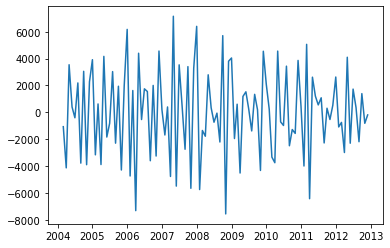

In [14]:
plt.plot(series)

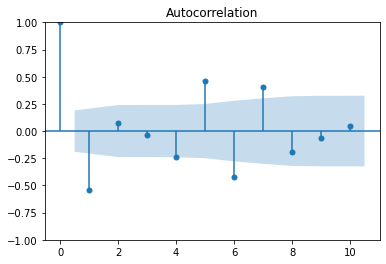

In [38]:
plot_acf(series, lags=10)
plt.show()

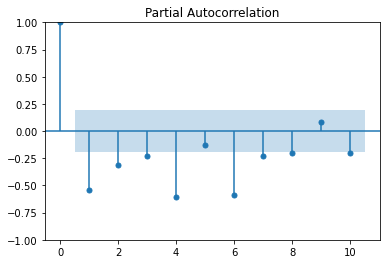

In [15]:
plot_pacf(series,lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

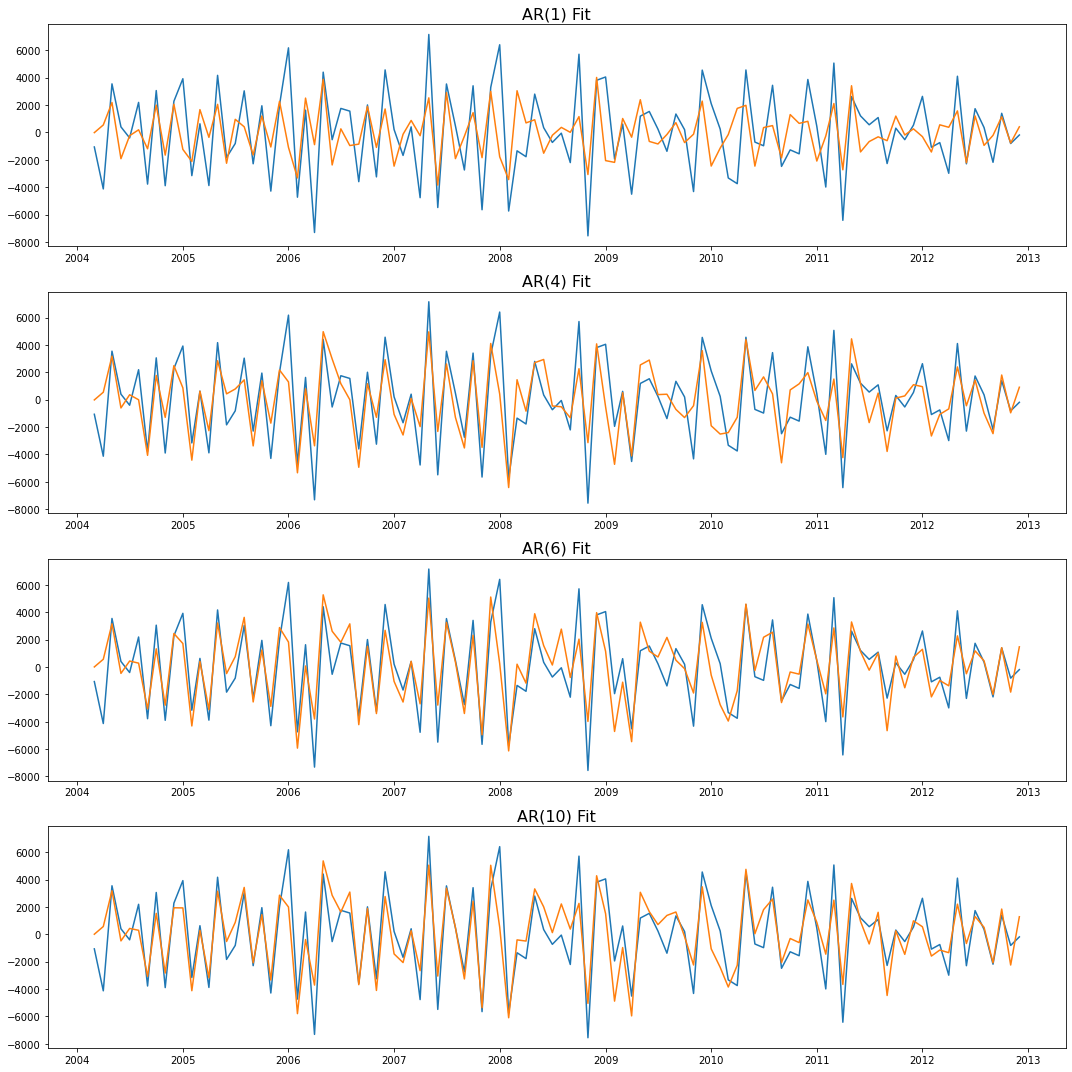

In [29]:
plt.figure(figsize=(15,15))
ar_orders=[1,4,6,10]
model_dict={}

for idx,ar_order in enumerate(ar_orders):
    model=sm.tsa.arima.ARIMA(series,order=(ar_order,0,0))
    model_fit = model.fit()
    model_dict[ar_order]=model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(model_fit.fittedvalues)
    plt.title("AR(%s) Fit"%ar_order,fontsize=16)
plt.tight_layout()

### Each model has:
### a log likelihood (l)
### a number of parameters (k)
### a number of samples used for fitting (n)
### AIC = 2k - 2l
### Lower AIC via higher log likelihood or less parameters
### BIC =  ln(n)k- 2l
### Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [32]:
model_dict

{1: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18469f3d280>,
 4: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18465ab8f10>,
 6: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18469dd2dc0>,
 10: <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x18469e9a430>}

In [36]:
for ar_order in ar_orders:
    print(f"AIC for AR{ar_order}: {model_dict[ar_order].aic}")

AIC for AR1: 1980.860621744531
AIC for AR4: 1927.6099852660332
AIC for AR6: 1899.6497442390246
AIC for AR10: 1902.376544973106


In [37]:
for ar_order in ar_orders:
    print(f"AIC for AR{ar_order}: {model_dict[ar_order].bic}")

AIC for AR1: 1988.8509390268673
AIC for AR4: 1943.5906198307055
AIC for AR6: 1920.9572569919212
AIC for AR10: 1934.337814102451
